In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read our data set
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
# See first few data...
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
# See last few data...
data.tail()

,id,label,tweet
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...


In [6]:
# Check how many data raws available...
data.shape

(7920, 3)

In [7]:
# Check for duplicate data raws...
data.duplicated().sum()

np.int64(0)

In [8]:
# Check for null data raws...
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [9]:
# DATA PREPROCESSING -> (Text Preprocessing)......

In [10]:
import re
import string

In [11]:
# Check the appearance of our text-data (first 5 lines)
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [12]:
# Step-01; Convert uppercase to lowercase

In [13]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [15]:
# Step-02; Remove links

In [16]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [17]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [18]:
# Step-03; Remove punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [21]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [22]:
# Step-04; Remove numbers

In [23]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [24]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [25]:
# Step-05; Remove stopwards

In [26]:
pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl (273 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk

In [28]:
# Download stopwards to our base_dir folder...
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
# Grab stopwards related to English Albhabet
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [30]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# Now we can remove stopwards from our data-set
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [32]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [34]:
# Step-06; Stemming

In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [36]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [37]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [38]:
# Overview lookup
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [39]:
# DATA PREPROCESSING -> (Vocabulary Building)......

In [41]:
from collections import Counter
vocab = Counter()

In [42]:
# Why we use Counter class...? -> 
# Every tweet is passed into that Counter class to check how many similar words and their count

In [43]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [44]:
vocab 

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [45]:
# Total unique words... (size of vacabulary, amount of features)
len(vocab)

15949

In [46]:
data.shape  # -> raws = 7920, columns = 3

(7920, 3)

In [47]:
# If the amount of features is higher than the data raws this can cause to overfit !!!
# So what we do ?
# We choose features which consist more than 10 times...
# Didn't go to a technique like feature selection...

In [48]:
tokens = [key for key in vocab if vocab[key] > 10]

In [49]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [50]:
len(tokens) # Size of our new vocabulary -> now overfitting problem is minimized...

1145

In [51]:
# Save that vocabulary to our specific file
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [ ]:
# DATA PREPROCESSING -> (Divide dataset to train & test)......

In [52]:
X = data['tweet']
y = data['label']

In [53]:
pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 6.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 6.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 6.8 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.1 MB 6.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 6.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 6.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 6.3 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
    --------------------------------------- 1.0/43.6 MB 7.2 MB/s eta 0:00:06
   -- -------------

In [54]:
# 20% for train & 80% for test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
X_train

21      excus waiter seem pie soup wife bake appl pie yay
3626                  ye real flagship phone market nokia
5800    would like wish amaz day make everi minut coun...
6052    fantasi manag footbal … андроид android game n...
6558    itun window screw machin app stuck kill everyt...
                              ...                        
2174    rt le happi birthday steve job stevejob appl m...
3688      replac wife iphon nd time week mind like outsid
2851    amaz headphon ever happi headphon appl iphon b...
3161    rt brerlappin rt dealsplu win appl macbook air...
4275    new iphon x get readi peopl it’ go intens ipho...
Name: tweet, Length: 6336, dtype: object

In [56]:
X_test

763     belov sister girl iphon beauti tree leav jj in...
3139    sunday sundaymorn sundaytimesza sundaybrunch s...
4111    im play big eye game applic funni appl android...
5928    new panda babi bear cute iphonex case design b...
5603    love dude latergram photooftheday pitsofig pit...
                              ...                        
2347      love new headphon soni mdr v soni headphon mdrv
2333           everyon iphon batteri life wantandroidback
7102    aunt comput suck song ipod think im gonna cri ...
3427    go bed got haircut todaymad bigmov hope wake p...
6520    finally～～find de white 小白 da house！d new samsu...
Name: tweet, Length: 1584, dtype: object

In [57]:
y_train

21      0
3626    1
5800    0
6052    0
6558    1
       ..
2174    0
3688    1
2851    0
3161    0
4275    0
Name: label, Length: 6336, dtype: int64

In [58]:
y_test

763     0
3139    0
4111    0
5928    0
5603    0
       ..
2347    0
2333    1
7102    1
3427    1
6520    0
Name: label, Length: 1584, dtype: int64

In [59]:
# DATA PREPROCESSING -> (Vectorization)......

In [60]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [61]:
vectorized_x_train = vectorizer(X_train, tokens)

In [62]:
vectorized_x_test = vectorizer(X_test, tokens)

In [63]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [64]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [66]:
# Randomly check weather it is vectorized or not  -> yes...
for i in vectorized_x_train[98]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [67]:
# To feed our model(train -> vecXtrain, Ytrain |||  test -> vecXtest, ytest)

In [68]:
# Check our train yDataset is imbalanced...

In [69]:
y_train.value_counts() # Yes it's imbalanced

label
0    4722
1    1614
Name: count, dtype: int64

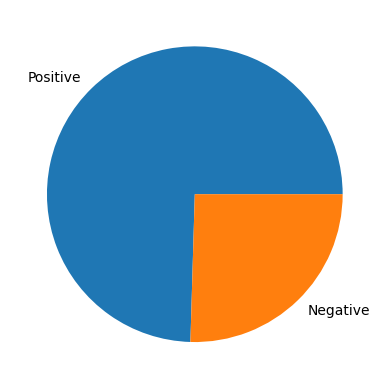

In [70]:
# Plot this
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [71]:
# DATA PREPROCESSING -> (Handle imbalancity)......

In [72]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [73]:
# Use smote technique
# Why we use this... In our training labels we can see amount of zeros are way higher. So our predictions can be
# slightly bias to one direcion as of that to prevent this we use this technique...

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9444, 1145) (9444,)


In [75]:
y_train_smote.value_counts()

label
0    4722
1    4722
Name: count, dtype: int64

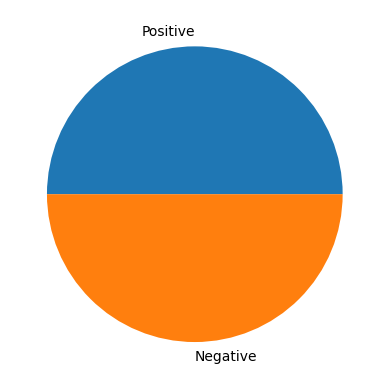

In [76]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [77]:
# Let's see now what we have got...

In [78]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9444, 1145), dtype=float32)

In [79]:
y_train_smote

0       0
1       1
2       0
3       0
4       1
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [80]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [83]:
y_test

763     0
3139    0
4111    0
5928    0
5603    0
       ..
2347    0
2333    1
7102    1
3427    1
6520    0
Name: label, Length: 1584, dtype: int64

In [84]:
# Model Building & Evaluation......

In [85]:
# Algorithms that we're going to use in here
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [87]:
# Matrices that we're gonna use...
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Methods to evaluate our model...
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [89]:
# Model for Logistic Regression
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.937
	Precision = 0.912
	Recall = 0.966
	F1-Score = 0.939
Testing Scores:
	Accuracy = 0.883
	Precision = 0.734
	Recall = 0.859
	F1-Score = 0.792


In [90]:
# Model for Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.867
	Recall = 0.96
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.871
	Precision = 0.686
	Recall = 0.925
	F1-Score = 0.788


In [91]:
# Model for Decision Tree Classifier
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.83
	Precision = 0.697
	Recall = 0.609
	F1-Score = 0.65


In [92]:
# Model for Random Forest Classifier
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.864
	Precision = 0.758
	Recall = 0.699
	F1-Score = 0.727


In [93]:
# Model for Support Vector Classifier
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.962
	Recall = 0.997
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.878
	Precision = 0.752
	Recall = 0.794
	F1-Score = 0.772


In [94]:
# So according to the results we decide to use Logistic Regression...!!!

In [95]:
# Let's save(serialize) that model as a pickle file
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)